# Project 1: SVM + Ensembles CLASSIFICATION

## Information of the project: predicting the probability of death

In this project, you have to predict the probability of death of a patient that is entering an ICU (Intensive Care Unit).

- The dataset comes from MIMIC project (https://mimic.physionet.org/). MIMIC-III (Medical Information Mart for Intensive Care III) is a large, freely-available database comprising deidentified health-related data associated with over forty thousand patients who stayed in critical care units of the Beth Israel Deaconess Medical Center between 2001 and 2012.
- **Each row of *mimic_train.csv* correponds to one ICU stay (*hadm_id*+*icustay_id*) of one patient (*subject_id*)**. Column *HOSPITAL_EXPIRE_FLAG* is the indicator of death (=1) as a result of the current hospital stay; this is the outcome to predict in our modelling exercise.
- The remaining columns correspond to vitals of each patient (when entering the ICU), plus some general characteristics (age, gender, etc.), and their explanation can be found at *mimic_patient_metadata.csv*.
- Please don't use any feature that you infer you don't know the first day of a patient in an ICU (e.g., the date of death). In particular, **please remove from both the training and testing sets 'DOD' 'DISCHTIME', 'DEATHTIME' and 'LOS'.**
- Note that the main cause/disease of patient condition is embedded as a code at *ICD9_diagnosis* column. The meaning of this code can be found at *MIMIC_metadata_diagnose.csv*. 
  - **But** this is only the main one; a patient can have co-occurrent diseases (comorbidities). 
  - These secondary codes can be found at *MIMIC_diagnoses.csv*.
- As performance metric, you can use *AUC* for the binary classification case, but feel free to report as well any other metric if you can justify that is particularly suitable for this case.
- There is an extra test dataset, *mimic_X_test.csv*. Apply your final model to this extra dataset and produce a prediction .csv file in same format as test_kaggle1.csv.

## Tasks

Main tasks are:
+ Using *mimic_train.csv* file build a predictive model for *HOSPITAL_EXPIRE_FLAG* .
+ For this analysis there is an extra test dataset, *mimic_X_test.csv*. Apply your final model to this extra dataset and generate predictions following the same format as *test_kaggle1.csv*. Once ready, you can submit to our Kaggle competition and iterate to improve the accuracy.

As a *bonus*, try different algorithms for neighbor search and for distance, and justify final selection. Try also different weights to cope with class imbalance and also to balance neighbor proximity. Try to assess somehow confidence interval of predictions.

## Tips

### Recommended implementation steps

1. ***Explore* and understand the dataset**.
   - Load train and test datasets, extra datasets if needed and check the unit identifiers. Understand the meaning of possible duplicates for the same identifier in all datasets (train/test/ extra).
   - How can you encode the diagnosis variable? - presumably, this will be very predictive of the probability of death.
   - Can you include any of the 'meta' or 'extra' data available with the dataset?
2. **Manage missing data**:   discard any non-numeric columns and columns with a high proportion of missing data.  Find a simple way to impute or remove any remaining missing data - remember you cannot remove test set observation or else kaggle won't be able to give you a score
3. **Manage categorial features**. E.g. create *dummy variables* for relevant categorical features, or build an ad hoc distance function.
4. Do **any further necessary preprocessing**.
5. **Build a prediction model**. Fit a SVM model explicitly calling the arguments we have talked about in class.
6. **Assess expected accuracy and tune your models** using *cross-validation*.
   - After preprocessing, split X_train into training and validation sets. *X_train_bis* (and *y_train_bis*), *X_valid* (and *y_valid*). 
   - The model tuning should be done on *X_train_bis*, *y_train_bis*.  
   - *X_valid*, *y_valid* is used to evaluate model performance before final testing. *X_test* is only used to compute final predictions.   
7. **Test the performance on the test file and report accuracy**, following same preparation steps (missing data, dummies, etc). Remember that you should be able to yield a prediction for all the rows of the test dataset.
8.  Which combination of model inputs can you tune to improve your predictions?
9.  **Submit to kaggle** and receive a score.

### Additional tips

- Apply each preprocessing steps immediately to both datasets (train and test), in order to not forget to apply some steps - avoid having a separate workflow for the test dataset. E.g., 
    ```{python}
    X_train.drop(labels=[ 'DOD', 'DISCHTIME', 'DEATHTIME', 'Diff'], axis=1, inplace=True)
    X_test.drop(labels=['DOD', 'X', 'DISCHTIME', 'DEATHTIME', 'Diff'], axis=1, inplace=True)
    ```
- Since one of the criteria for evaluation is "code running," if you are not using Google Colab, please check and document the versions of the packages you are using. This ensures that when I run the code, I can use the same versions and verify that everything works correctly. For example:
    ```{python}
    numpy.__version__
    sklearn.__version__
    ```
- Feel free to reduce the training dataset if you experience computational constraints.
- Allowed models:
  - SVM and any tree-based model seen in class (not neural networks).
  - Possible to use small variations of the models used in class (such as variations of random forests or variations of the XGBoost, like CatBoost). However, "make sure to explain what differs with the basic version of the algorithm".
  - Don't use models not seen in class.
  - If in the set of basic learners in your ensembles there's  Lasso, KNN, Ridge, or a Decision tree model, this is not a problem, we also defined ensembles with some of these classic ML models in class.
- Don't focus too much on finding the best model architecture, but work on processing the data well, (filling missing data, use all external data you have at disposal) as the highest part of the grade will be based on that.
- All dates in the database are shifted in the future, but these are internally consistent within the same patient. See some more details for older patients here: https://mimic.mit.edu/docs/iii/about/time/.
- If some models take too long to train and running the entire notebook exceeds 20-25 minutes, you can save the trained model objects, comment out the training lines, and upload the results separately. Then, incorporate them into the notebook by importing the saved objects. 
- Note that for cross-validation, you can also comment out the lines related to the trial parameter setups you tested. Estimate the best model and add a comment in the notebook explaining your selection/cv procedure.
- Note that **time variables are shifted**!!! Specifically, see:
  - https://mimic.mit.edu/docs/iii/tables/patients/. They say that "Patients who are older than 89 years old at any time in the database have had their date of birth shifted to obscure their age and comply with HIPAA. The shift process was as follows: the patient’s age at their first admission was determined."
  - https://mimic.mit.edu/docs/iii/about/time/. About time and date variables. Relevant notes:
    - "All dates in the database have been shifted to protect patient confidentiality. Dates will be internally consistent for the same patient, but randomly distributed in the future. This means that if measurement A is made at 2150-01-01 14:00:00, and measurement B is made at 2150-01-01 15:00:00, then measurement B was made 1 hour after measurement A."
    - The date shifting removed the following:
      - Year - The year is randomly distributed between 2100 - 2200.
      - Day of the month - The absolute day of the month is not preserved.
      - Inter-patient information - Two patients in the ICU on 2150-01-01 were not in the ICU at the same time

## Evaluation

The evaluation metric for this competition is ROC AUC (Area Under the Curve). The AUC, commonly used in binary classification models, measures the area under a curve that is obtained by varying the threshold for binary classification (0.5 by default) and computing True Positive Rates and False Positive Rates (http://en.wikipedia.org/wiki/Receiver_operating_characteristic).

## Main criteria for grading (extended project)

These components are only related to the extended projects:
+ Code runs - 20%
+ Data preparation - 35%
+ SVM method(s) have been used - 10%
+ Probability of death for each test patient is computed - 10%
+ Accuracy of predictions (in class - kaggle) - 5%
+ Accuracy of predictions for test patients is calculated (kaggle) - 10%
+ Hyperparameter optimization - 10%
+ Neat and understandable code, with some titles and comments - 0%
+ Improved methods from what we discussed in class (properly explained/justified) - 0%

## Submission file

Submission Format
For every patient in the dataset, submission files should contain two columns: icustayid (this defines the individual prediction, and it's extracted from the test dataset) and HOSPITAL_EXPIRE_FLAG (float number between 0 and 1, the probability of death)..

The file should contain a header and have the following format:

``` {python}
icustay_id,HOSPITAL_EXPIRE_FLAG
2,0.651
5,0.004
6,0.104
etc.
```

1) create a pandas dataframe with two columns, one with the test set "icustay_id"'s and the other with your predicted "HOSPITAL_EXPIRE_FLAG" for that observation

2) use the <i> .to_csv </i> pandas method to create a csv file. The <i> index = False </i> is important to ensure the <i> .csv </i> is in the format kaggle expects

# 0. Libraries and importing the data

## Packages

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import plotly.express as px

## Data

In [38]:
# Training dataset
df = pd.read_csv('data/mimic_train.csv')
df.drop(columns = ['Unnamed: 0', 'DOD', 'DISCHTIME', 'DEATHTIME', 'LOS', 'Diff'], inplace = True)  # Remove variables with target leakage

In [39]:
# Secondary diagnoses dataset
df_secdiag = pd.read_csv('data/MIMIC_diagnoses.csv')

In [40]:
# Test dataset (to produce predictions)
df_test=pd.read_csv('data/mimic_X_test.csv')
df_test.drop(columns = ['Unnamed: 0', 'DOD', 'DISCHTIME', 'DEATHTIME', 'LOS', 'Diff'], inplace = True)  # Remove variables with target leakage

In [41]:
# Sample output prediction file
pred_sample=pd.read_csv('data/test_kaggle1.csv')
pred_sample.sort_values('icustay_id').head()

,icustay_id,HOSPITAL_EXPIRE_FLAG
8505,200024,0.197630
2976,200028,0.099115
12647,200034,0.000000
8600,200061,0.092823
1942,200067,0.000000


## Data preview

In [42]:
df.head()

,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,...,DOB,ADMITTIME,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT
0,0,77502,151200,299699,89.0,116.0,102.677419,97.0,150.0,126.000000,...,2120-12-07 00:00:00,2183-03-14 16:11:00,EMERGENCY,Medicare,PROTESTANT QUAKER,DIVORCED,BLACK/AFRICAN AMERICAN,ASTHMA;CHRONIC OBST PULM DISEASE,49121,MICU
1,0,44346,140114,250021,74.0,114.0,92.204082,87.0,160.0,122.000000,...,2103-03-10 00:00:00,2165-04-04 02:25:00,EMERGENCY,Private,EPISCOPALIAN,DIVORCED,WHITE,S/P PEDESTRIAN STRUCK,80620,TSICU
2,0,92438,118589,288511,59.0,89.0,70.581395,88.0,160.0,120.933333,...,2104-08-12 00:00:00,2177-06-23 12:33:00,EMERGENCY,Medicare,CATHOLIC,MARRIED,WHITE,STERNAL WOUND INFECTION,99859,CSRU
3,1,83663,125553,278204,75.0,86.0,80.400000,74.0,102.0,85.227273,...,2105-07-06 00:00:00,2167-07-17 21:34:00,EMERGENCY,Private,CATHOLIC,MARRIED,BLACK/AFRICAN AMERICAN,SEPSIS,27652,MICU
4,0,85941,181409,292581,77.0,107.0,91.020408,95.0,150.0,108.625000,...,2112-12-12 00:00:00,2174-03-09 12:17:00,EMERGENCY,Medicaid,NOT SPECIFIED,DIVORCED,WHITE,BILE LEAK,9974,MICU


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HOSPITAL_EXPIRE_FLAG  8000 non-null   int64  
 1   subject_id            8000 non-null   int64  
 2   hadm_id               8000 non-null   int64  
 3   icustay_id            8000 non-null   int64  
 4   HeartRate_Min         7167 non-null   float64
 5   HeartRate_Max         7167 non-null   float64
 6   HeartRate_Mean        7167 non-null   float64
 7   SysBP_Min             7160 non-null   float64
 8   SysBP_Max             7160 non-null   float64
 9   SysBP_Mean            7160 non-null   float64
 10  DiasBP_Min            7160 non-null   float64
 11  DiasBP_Max            7160 non-null   float64
 12  DiasBP_Mean           7160 non-null   float64
 13  MeanBP_Min            7167 non-null   float64
 14  MeanBP_Max            7167 non-null   float64
 15  MeanBP_Mean          

In [44]:
# Now, we get a better visualization of the data types of the dataset
def dataframe_dtypes_overview(df):

    """
    Provides an overview of the data types in a DataFrame, including counts and variable names.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    
    Returns:
    None: Prints the data type counts and variable names grouped by type.
    """

    dtype_counts = df.dtypes.value_counts()
    print("Data Type Overview:")
    for dtype, count in dtype_counts.items():
        print(f"\nData type: {dtype} ({count} variables)")
        cols = df.select_dtypes(include=[dtype]).columns
        print("Variables:", ", ".join(cols))

dataframe_dtypes_overview(df)

Data Type Overview:

Data type: float64 (24 variables)
Variables: HeartRate_Min, HeartRate_Max, HeartRate_Mean, SysBP_Min, SysBP_Max, SysBP_Mean, DiasBP_Min, DiasBP_Max, DiasBP_Mean, MeanBP_Min, MeanBP_Max, MeanBP_Mean, RespRate_Min, RespRate_Max, RespRate_Mean, TempC_Min, TempC_Max, TempC_Mean, SpO2_Min, SpO2_Max, SpO2_Mean, Glucose_Min, Glucose_Max, Glucose_Mean

Data type: object (11 variables)
Variables: GENDER, DOB, ADMITTIME, ADMISSION_TYPE, INSURANCE, RELIGION, MARITAL_STATUS, ETHNICITY, DIAGNOSIS, ICD9_diagnosis, FIRST_CAREUNIT

Data type: int64 (4 variables)
Variables: HOSPITAL_EXPIRE_FLAG, subject_id, hadm_id, icustay_id


Recap of the variables in the dataset:

- **Target**: `HOSPITAL_EXPIRE_FLAG` (1 if the patient died during a hospital stay). It is a classification task.
- **Identifiers**: 3 identifiers.
  - `subject_id`: unique identifier for a patient (7,093 unique values out of 8,000 obs. - checked with the data wrangler extension).
  - `hadm_id`: hospital stay identifier (7,812 unique values out of 8,000 obs.). This denotes that a hospital stay can be associated with more than one stay in the ICU.
  - `icustay_id`: ICU stay identifier (8,000 unique values).
  - Since each row is one ICU stay for one patient, the relevant identifiers are at the subject and ICU stay. Nonetheless, it could be interesting to create (**feature creation idea**):
    - A feature with the `subject_id` variable that counts the number of times a certain patient has been in the ICU overall.
    - A feature with the `hadm_id` variable that counts the number of times a certain patient has been in the ICU for the same hospital stay.
- **Features**: 36 features overall. They are divided in:
  - *Vitals of the patient on the 1st day of entering the ICU*. Overall, 24 of these features.
    - They are all numerical features. 
    - Minimum, maximum and average values of: heart rate (3), systolic blood pressure (3), diastolic blood pressure (3), mean blood pressure (3), respiration rate (3), temperature in Cº (3), SpO2 - oxygen in blood (3) and glucose levels (3). 
  - *Diagnosis* variables: 2 categorical features.
    - `ICD9_diagnosis` - diagnosis code of the most relevant disease of the patient when entering the ICU. `DIAGNOSIS` is a short explanation (in words) of the diagnosis code. Note, however, that the number of distinct values in both columns is not the same, so either the diagnosis text is mispelled/written differently sometimes or the text includes more detail on the diagnosis. The complete metadata for the diagnosis codes can be found in *MIMIC_metadata_diagnose.csv*.
    - Also, note that one patient can be diagnosed with more than one disease during the ICU stay. *MIMIC_diagnoses.csv* includes the additional comorbidities of a patient for a given hospital stay.
      - More complete explanation in: https://mimic.mit.edu/docs/iii/tables/diagnoses_icd/
      - One relevant row is the `SEQ_NUM` row, which "provides the order in which the ICD diagnoses relate to the patient. ICD diagnoses are ordered by priority".
      - **Feature creation idea**: merge datasets, creating new columns with secondary diseases ordered by their relevance. Add also the count of comorbidities of a patient during a hospital stay.
    - Lookup tool for the codes: https://www.findacode.com/search/search.php.
      - Using this lookup table, it appears that the standard format for the ICD9 codes is of 3 digits + `.` + up to 2 more digits (which specify the illness). 
      - In our dataset, the format is "03812" or "1970", but it refers to the codes "038.12" and "197.0", respectively. This also applies for codes which start with a letter, such as "V4582" - it should be "V45.82".
      - I have checked for this manually with the lookup tool that is referenced here and with the metadata.
      - **Feature creation idea**: search rates of death for ICD-9 diseases, and merge the estimates with the dataset. That way, we can have a continuous variable with not as many categories as the current disease diagnose variable.
        - Computing the fatality rates of diseases using the target of the training dataset is probably not the optimal thing in this case, as there are more unique diseases in the test dataset than in the training dataset (which will lead to lower precision).
        - Instead, below what we compute is a medical index for the risk of mortality of a patient, considering her comorbidities.
  - *Characteristics of the stay*: 4 features overall. 
    - Time variables: admission time (`ADMITTIME`) and `Diff`, which is described as "Days to add to any datetime of this patient to become realistic datetimes". This seems to be a way to convert dates to the gregorian calendar.
    - Categorical variables: `ADMISSION_TYPE` ("emergency", "elective" or "urgent") and `FIRST_CAREUNIT` (type of the first ICU assigned to the patient - for the meaning of the different care units, check `PREV_CAREUNIT` in https://mimic.mit.edu/docs/iii/tables/transfers/).
  - *Other characteristics of the patient*. Overall, 6 features.
    - 5 categorical features: `GENDER`, `INSURANCE` (type of patient's insurance), `RELIGION`, `MARITAL_STATUS` and `ETHNICITY`.
    - 1 time feature: `DOB` (date of birth). **Feature creation idea**: compute age.

# 1. Feature creation

## 1.1. Adapting secondary diagnosis data for calculation of Charlson Comorbidity Index

In [45]:
# First, concatenate training and test datasets to get all of the unique patients 
# and hospital admission IDs

df['train'] = 1  # Add a flag for training variables

df_test['train'] = 0  # Flag for test variables (0)

df_concat = pd.concat([df, df_test])

df_concat

,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,...,ADMITTIME,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT,train
0,0.0,77502,151200,299699,89.0,116.0,102.677419,97.0,150.0,126.000000,...,2183-03-14 16:11:00,EMERGENCY,Medicare,PROTESTANT QUAKER,DIVORCED,BLACK/AFRICAN AMERICAN,ASTHMA;CHRONIC OBST PULM DISEASE,49121,MICU,1
1,0.0,44346,140114,250021,74.0,114.0,92.204082,87.0,160.0,122.000000,...,2165-04-04 02:25:00,EMERGENCY,Private,EPISCOPALIAN,DIVORCED,WHITE,S/P PEDESTRIAN STRUCK,80620,TSICU,1
2,0.0,92438,118589,288511,59.0,89.0,70.581395,88.0,160.0,120.933333,...,2177-06-23 12:33:00,EMERGENCY,Medicare,CATHOLIC,MARRIED,WHITE,STERNAL WOUND INFECTION,99859,CSRU,1
3,1.0,83663,125553,278204,75.0,86.0,80.400000,74.0,102.0,85.227273,...,2167-07-17 21:34:00,EMERGENCY,Private,CATHOLIC,MARRIED,BLACK/AFRICAN AMERICAN,SEPSIS,27652,MICU,1
4,0.0,85941,181409,292581,77.0,107.0,91.020408,95.0,150.0,108.625000,...,2174-03-09 12:17:00,EMERGENCY,Medicaid,NOT SPECIFIED,DIVORCED,WHITE,BILE LEAK,9974,MICU,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12880,NaN,28519,140024,241050,NaN,NaN,NaN,NaN,NaN,NaN,...,2180-04-30 14:48:00,EMERGENCY,Medicare,GREEK ORTHODOX,MARRIED,WHITE,CEREBROVASCULAR ACCIDENT,431,SICU,0
12881,NaN,2338,145012,233204,80.0,85.0,81.947368,81.0,107.0,94.176471,...,2158-12-15 23:01:00,EMERGENCY,Private,NOT SPECIFIED,MARRIED,WHITE,S/P ARREST,4271,MICU,0
12882,NaN,28043,135417,244530,65.0,92.0,78.500000,60.0,160.0,110.976190,...,2176-06-17 06:36:00,EMERGENCY,Medicare,CATHOLIC,MARRIED,WHITE,ALTERED MENTAL STATUS,3229,MICU,0
12883,NaN,47492,152608,274507,58.0,97.0,76.933333,94.0,131.0,112.037037,...,2118-10-18 17:54:00,EMERGENCY,Private,PROTESTANT QUAKER,DIVORCED,BLACK/AFRICAN AMERICAN,HYPOGLYCEMIA,24980,MICU,0


In [46]:
# Unique patients and hospital admission IDs
unique_patients = df_concat['subject_id'].unique()

unique_hospitaladm = df_concat['hadm_id'].unique()

In [47]:
# Keep only those observations of secondary diagnoses with hospital stays in the
# main training and test data frames

df_secdiag_filtered = df_secdiag[df_secdiag['HADM_ID'].isin(unique_hospitaladm)]

df_secdiag_filtered

,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,256,108811,1.0,53240
1,256,108811,2.0,41071
2,256,108811,3.0,53560
3,256,108811,4.0,40390
4,256,108811,5.0,5859
...,...,...,...,...
651015,63999,120514,10.0,3669
651016,63999,120514,11.0,V1083
651017,63999,120514,12.0,V1582
651018,63999,120514,13.0,33829


In [48]:
# We add a "D" of "diagnose" in front of the ICD-9 codes
df_secdiag_filtered['ICD9_CODE_D'] = 'D' + df_secdiag_filtered['ICD9_CODE'].astype(str)

df_secdiag_filtered

/tmp/ipykernel_6935/314360509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_secdiag_filtered['ICD9_CODE_D'] = 'D' + df_secdiag_filtered['ICD9_CODE'].astype(str)


,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ICD9_CODE_D
0,256,108811,1.0,53240,D53240
1,256,108811,2.0,41071,D41071
2,256,108811,3.0,53560,D53560
3,256,108811,4.0,40390,D40390
4,256,108811,5.0,5859,D5859
...,...,...,...,...,...
651015,63999,120514,10.0,3669,D3669
651016,63999,120514,11.0,V1083,DV1083
651017,63999,120514,12.0,V1582,DV1582
651018,63999,120514,13.0,33829,D33829


In [49]:
# Group by HADM_ID, sort each group by SEQ_NUM (in ascending order), and
# aggregate the ICD9_CODE into a list:

grouped_secdiag = df_secdiag_filtered.groupby('HADM_ID').apply(
    lambda x: x.sort_values('SEQ_NUM', ascending = True)['ICD9_CODE_D'].tolist()
).reset_index(name='ICD9_ordered_comorbidities_list')

grouped_secdiag.rename(columns = {'HADM_ID': 'hadm_id'}, inplace = True)

# Create comma-separated strings with comorbidities
grouped_secdiag['ICD9_ordered_comorbidities_string'] = grouped_secdiag['ICD9_ordered_comorbidities_list'].apply(lambda x: ','.join(map(str, x)))

grouped_secdiag

/tmp/ipykernel_6935/2305714062.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_secdiag = df_secdiag_filtered.groupby('HADM_ID').apply(


,hadm_id,ICD9_ordered_comorbidities_list,ICD9_ordered_comorbidities_string
0,100001,"[D25013, D3371, D5849, D5780, DV5867, D25063, ...","D25013,D3371,D5849,D5780,DV5867,D25063,D5363,D..."
1,100003,"[D53100, D2851, D07054, D5715, D45621, D53789,...","D53100,D2851,D07054,D5715,D45621,D53789,D4019,..."
2,100009,"[D41401, D99604, D4142, D25000, D27800, DV8535...","D41401,D99604,D4142,D25000,D27800,DV8535,D4148..."
3,100010,"[D1890, D1961, D1987, D1976, D27652]","D1890,D1961,D1987,D1976,D27652"
4,100011,"[D85206, D82111, D86403, D48242, D8600, D2851,...","D85206,D82111,D86403,D48242,D8600,D2851,D86121..."
...,...,...,...
19744,199979,"[D4241, D51852, D41401, D42731, D4019, D2724, ...","D4241,D51852,D41401,D42731,D4019,D2724,D25000,..."
19745,199984,"[D41071, D5990, D41401, D42731, D2449, D4019, ...","D41071,D5990,D41401,D42731,D2449,D4019,D2724,D..."
19746,199992,"[D42789, D5070, D5849, D2760, D1120, D2449, D0...","D42789,D5070,D5849,D2760,D1120,D2449,D0539,D32..."
19747,199998,"[D41401, D9971, D9975, D42731, D78820, D4111, ...","D41401,D9971,D9975,D42731,D78820,D4111,DV4582,..."


In [50]:
# Now, we merge the previous data frame with the ICU code, subject ID and main
# comorbidity of the general data frame

merged_diagnose = df_concat[['subject_id', 'hadm_id', 'icustay_id', 'ICD9_diagnosis', 'train']].merge(
    right = grouped_secdiag, how = 'left', on = 'hadm_id')

merged_diagnose

,subject_id,hadm_id,icustay_id,ICD9_diagnosis,train,ICD9_ordered_comorbidities_list,ICD9_ordered_comorbidities_string
0,77502,151200,299699,49121,1,"[D49121, D51884, D42823, D4254, D2639, DV850, ...","D49121,D51884,D42823,D4254,D2639,DV850,D4280,D..."
1,44346,140114,250021,80620,1,"[D80620, D51881, D8604, D99709, D56089, D80709...","D80620,D51881,D8604,D99709,D56089,D80709,D8238..."
2,92438,118589,288511,99859,1,"[D99859, D5192, D99831, D73008, D7854, D41400,...","D99859,D5192,D99831,D73008,D7854,D41400,DV4581..."
3,83663,125553,278204,27652,1,"[D27652, D5856, D1508, D1977, D40391, D4254, D...","D27652,D5856,D1508,D1977,D40391,D4254,D78959,D..."
4,85941,181409,292581,9974,1,"[D9974, D0389, D99592, D78552, D51881, D5849, ...","D9974,D0389,D99592,D78552,D51881,D5849,D42823,..."
...,...,...,...,...,...,...,...
20880,28519,140024,241050,431,0,"[D431, D5990, D43820, D0414, DV4501, D4019, D2...","D431,D5990,D43820,D0414,DV4501,D4019,D25000,D4..."
20881,2338,145012,233204,4271,0,"[D4271, D42823, D5849, D6827, D3481, D4280, D7...","D4271,D42823,D5849,D6827,D3481,D4280,D73027,D4..."
20882,28043,135417,244530,3229,0,"[D3229, D3453, D5849, D51881, D2762, D99679, D...","D3229,D3453,D5849,D51881,D2762,D99679,D4538,D4..."
20883,47492,152608,274507,24980,0,"[D24980, D5990, DE9323, D4019, D7140, D53081]","D24980,D5990,DE9323,D4019,D7140,D53081"


Note that the comorbidity in `ICD9_diagnosis` matches the first comorbidity in the last column. Thus, we can drop the `ICD9_diagnosis` column.

In [51]:
merged_diagnose.drop(columns = 'ICD9_diagnosis', inplace = True)

merged_diagnose

,subject_id,hadm_id,icustay_id,train,ICD9_ordered_comorbidities_list,ICD9_ordered_comorbidities_string
0,77502,151200,299699,1,"[D49121, D51884, D42823, D4254, D2639, DV850, ...","D49121,D51884,D42823,D4254,D2639,DV850,D4280,D..."
1,44346,140114,250021,1,"[D80620, D51881, D8604, D99709, D56089, D80709...","D80620,D51881,D8604,D99709,D56089,D80709,D8238..."
2,92438,118589,288511,1,"[D99859, D5192, D99831, D73008, D7854, D41400,...","D99859,D5192,D99831,D73008,D7854,D41400,DV4581..."
3,83663,125553,278204,1,"[D27652, D5856, D1508, D1977, D40391, D4254, D...","D27652,D5856,D1508,D1977,D40391,D4254,D78959,D..."
4,85941,181409,292581,1,"[D9974, D0389, D99592, D78552, D51881, D5849, ...","D9974,D0389,D99592,D78552,D51881,D5849,D42823,..."
...,...,...,...,...,...,...
20880,28519,140024,241050,0,"[D431, D5990, D43820, D0414, DV4501, D4019, D2...","D431,D5990,D43820,D0414,DV4501,D4019,D25000,D4..."
20881,2338,145012,233204,0,"[D4271, D42823, D5849, D6827, D3481, D4280, D7...","D4271,D42823,D5849,D6827,D3481,D4280,D73027,D4..."
20882,28043,135417,244530,0,"[D3229, D3453, D5849, D51881, D2762, D99679, D...","D3229,D3453,D5849,D51881,D2762,D99679,D4538,D4..."
20883,47492,152608,274507,0,"[D24980, D5990, DE9323, D4019, D7140, D53081]","D24980,D5990,DE9323,D4019,D7140,D53081"


In [52]:
# Export to .csv
merged_diagnose.to_csv('preprocessed_datasets/01_merged_diagnoses_traintest.csv')

### Calculation of comorbidity (risk) indexes for each patient and ICU stay in the training and test dataset

- The Charlson Comorbidity Index summarizes the mortality of a patient with a range of concurrent conditions. For more information, see https://en.wikipedia.org/wiki/Charlson_Comorbidity_Index.
- The Elixhauser Comorbidity Index is an alternative index that provides similar information: https://en.wikipedia.org/wiki/Elixhauser_Comorbidity_Index

Below, we import a dataset which we have created in R (attached in the folder - `calculating_cci.R`) where we compute the Charlson Comorbidity Index for each patient and ICU stay. This gives a measure of the risk of mortality of each patient given his or her comorbidities. For computing the indexes, I have used the `medicalrisk` package: https://cran.r-project.org/web/packages/medicalrisk/index.html.

In [53]:
df_cci = pd.read_csv('preprocessed_datasets/02_icu_comorbidity_indexes.csv')

df_cci.rename(columns = {'index': 'cci_index'}, inplace = True)

df_cci

,icustay_id,cci_index
0,200001,0
1,200010,0
2,200016,1
3,200021,0
4,200024,0
...,...,...
20880,299962,0
20881,299972,1
20882,299986,0
20883,299995,0


In [54]:
merged_diagnose_cci = merged_diagnose.merge(right = df_cci, on = 'icustay_id', how = 'left')

merged_diagnose_cci

,subject_id,hadm_id,icustay_id,train,ICD9_ordered_comorbidities_list,ICD9_ordered_comorbidities_string,cci_index
0,77502,151200,299699,1,"[D49121, D51884, D42823, D4254, D2639, DV850, ...","D49121,D51884,D42823,D4254,D2639,DV850,D4280,D...",2
1,44346,140114,250021,1,"[D80620, D51881, D8604, D99709, D56089, D80709...","D80620,D51881,D8604,D99709,D56089,D80709,D8238...",0
2,92438,118589,288511,1,"[D99859, D5192, D99831, D73008, D7854, D41400,...","D99859,D5192,D99831,D73008,D7854,D41400,DV4581...",0
3,83663,125553,278204,1,"[D27652, D5856, D1508, D1977, D40391, D4254, D...","D27652,D5856,D1508,D1977,D40391,D4254,D78959,D...",0
4,85941,181409,292581,1,"[D9974, D0389, D99592, D78552, D51881, D5849, ...","D9974,D0389,D99592,D78552,D51881,D5849,D42823,...",0
...,...,...,...,...,...,...,...
20880,28519,140024,241050,0,"[D431, D5990, D43820, D0414, DV4501, D4019, D2...","D431,D5990,D43820,D0414,DV4501,D4019,D25000,D4...",1
20881,2338,145012,233204,0,"[D4271, D42823, D5849, D6827, D3481, D4280, D7...","D4271,D42823,D5849,D6827,D3481,D4280,D73027,D4...",0
20882,28043,135417,244530,0,"[D3229, D3453, D5849, D51881, D2762, D99679, D...","D3229,D3453,D5849,D51881,D2762,D99679,D4538,D4...",0
20883,47492,152608,274507,0,"[D24980, D5990, DE9323, D4019, D7140, D53081]","D24980,D5990,DE9323,D4019,D7140,D53081",0


Now, we merge back into the training and test datasets the information that has been calculated that is relevant:
- The complete list of comorbidities.
- The CCI.

*Note*: we cannot compute the relative frequency of deaths for main comorbidities with the training set, because the test dataset has more unique (main) diseases than the training. So we would end up with null values in the test dataset, which is not possible. 

In [55]:
df_concat_mod1 = df_concat.merge(right = merged_diagnose_cci[['icustay_id', 'ICD9_ordered_comorbidities_list', 'cci_index']], on = 'icustay_id', how = 'left')

In [56]:
df_concat_mod1.head()

,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,...,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT,train,ICD9_ordered_comorbidities_list,cci_index
0,0.0,77502,151200,299699,89.0,116.0,102.677419,97.0,150.0,126.000000,...,Medicare,PROTESTANT QUAKER,DIVORCED,BLACK/AFRICAN AMERICAN,ASTHMA;CHRONIC OBST PULM DISEASE,49121,MICU,1,"[D49121, D51884, D42823, D4254, D2639, DV850, ...",2
1,0.0,44346,140114,250021,74.0,114.0,92.204082,87.0,160.0,122.000000,...,Private,EPISCOPALIAN,DIVORCED,WHITE,S/P PEDESTRIAN STRUCK,80620,TSICU,1,"[D80620, D51881, D8604, D99709, D56089, D80709...",0
2,0.0,92438,118589,288511,59.0,89.0,70.581395,88.0,160.0,120.933333,...,Medicare,CATHOLIC,MARRIED,WHITE,STERNAL WOUND INFECTION,99859,CSRU,1,"[D99859, D5192, D99831, D73008, D7854, D41400,...",0
3,1.0,83663,125553,278204,75.0,86.0,80.400000,74.0,102.0,85.227273,...,Private,CATHOLIC,MARRIED,BLACK/AFRICAN AMERICAN,SEPSIS,27652,MICU,1,"[D27652, D5856, D1508, D1977, D40391, D4254, D...",0
4,0.0,85941,181409,292581,77.0,107.0,91.020408,95.0,150.0,108.625000,...,Medicaid,NOT SPECIFIED,DIVORCED,WHITE,BILE LEAK,9974,MICU,1,"[D9974, D0389, D99592, D78552, D51881, D5849, ...",0


## 1.2. Number of ICU stays per subject and per hospital stay

In [57]:
# Compute ICU stays per hospital stay
icustays_per_hosp = df_concat_mod1.groupby('hadm_id').size().reset_index(name = 'icustays_per_hospstay')

# Compute ICU stays per subject
icustays_per_subj = df_concat_mod1.groupby('subject_id').size().reset_index(name = 'icustays_per_subject')

# Merge back into the data frame
df_concat_mod2 = df_concat_mod1.merge(right = icustays_per_hosp, on = 'hadm_id', how = 'left').merge(
    right = icustays_per_subj, on = 'subject_id', how = 'left')

df_concat_mod2.head()

,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,...,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT,train,ICD9_ordered_comorbidities_list,cci_index,icustays_per_hospstay,icustays_per_subject
0,0.0,77502,151200,299699,89.0,116.0,102.677419,97.0,150.0,126.000000,...,DIVORCED,BLACK/AFRICAN AMERICAN,ASTHMA;CHRONIC OBST PULM DISEASE,49121,MICU,1,"[D49121, D51884, D42823, D4254, D2639, DV850, ...",2,1,2
1,0.0,44346,140114,250021,74.0,114.0,92.204082,87.0,160.0,122.000000,...,DIVORCED,WHITE,S/P PEDESTRIAN STRUCK,80620,TSICU,1,"[D80620, D51881, D8604, D99709, D56089, D80709...",0,1,1
2,0.0,92438,118589,288511,59.0,89.0,70.581395,88.0,160.0,120.933333,...,MARRIED,WHITE,STERNAL WOUND INFECTION,99859,CSRU,1,"[D99859, D5192, D99831, D73008, D7854, D41400,...",0,1,2
3,1.0,83663,125553,278204,75.0,86.0,80.400000,74.0,102.0,85.227273,...,MARRIED,BLACK/AFRICAN AMERICAN,SEPSIS,27652,MICU,1,"[D27652, D5856, D1508, D1977, D40391, D4254, D...",0,1,1
4,0.0,85941,181409,292581,77.0,107.0,91.020408,95.0,150.0,108.625000,...,DIVORCED,WHITE,BILE LEAK,9974,MICU,1,"[D9974, D0389, D99592, D78552, D51881, D5849, ...",0,1,1


## 1.3. Counts of comorbidities per ICU stay

In [58]:
# We just compute the length of the list of comorbidities
df_concat_mod2['number_comorbidities'] = df_concat_mod2['ICD9_ordered_comorbidities_list'].apply(len)
df_concat_mod2.head()

,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,...,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT,train,ICD9_ordered_comorbidities_list,cci_index,icustays_per_hospstay,icustays_per_subject,number_comorbidities
0,0.0,77502,151200,299699,89.0,116.0,102.677419,97.0,150.0,126.000000,...,BLACK/AFRICAN AMERICAN,ASTHMA;CHRONIC OBST PULM DISEASE,49121,MICU,1,"[D49121, D51884, D42823, D4254, D2639, DV850, ...",2,1,2,28
1,0.0,44346,140114,250021,74.0,114.0,92.204082,87.0,160.0,122.000000,...,WHITE,S/P PEDESTRIAN STRUCK,80620,TSICU,1,"[D80620, D51881, D8604, D99709, D56089, D80709...",0,1,1,9
2,0.0,92438,118589,288511,59.0,89.0,70.581395,88.0,160.0,120.933333,...,WHITE,STERNAL WOUND INFECTION,99859,CSRU,1,"[D99859, D5192, D99831, D73008, D7854, D41400,...",0,1,2,10
3,1.0,83663,125553,278204,75.0,86.0,80.400000,74.0,102.0,85.227273,...,BLACK/AFRICAN AMERICAN,SEPSIS,27652,MICU,1,"[D27652, D5856, D1508, D1977, D40391, D4254, D...",0,1,1,11
4,0.0,85941,181409,292581,77.0,107.0,91.020408,95.0,150.0,108.625000,...,WHITE,BILE LEAK,9974,MICU,1,"[D9974, D0389, D99592, D78552, D51881, D5849, ...",0,1,1,24


## 1.4. Age of the patient at time of admission

Two relevant notes:
- Date shifting removed the information of the year when a patient was in the ICU.
- Dates of birth which occur in the present time are not true dates of birth. Furthermore, dates of birth which occur before the year 1900 occur if the patient is older than 89. In these cases, the patient’s age at their first admission has been fixed to 300.

For more information, check https://mimic.mit.edu/docs/iii/about/time/.

In [59]:
df_concat_mod3 = df_concat_mod2.copy()

In [ ]:
# Convert the columns to datetime
df_concat_mod3['ADMITTIME'] = pd.to_datetime(df_concat_mod3['ADMITTIME'])
df_concat_mod3['DOB'] = pd.to_datetime(df_concat_mod3['DOB'])

# Compute age in years
df_concat_mod3['age_admission'] = (
    df_concat_mod3['ADMITTIME'].dt.year - df_concat_mod3['DOB'].dt.year
)

# Set age to 90 if age is 300 years or more
df_concat_mod3.loc[df_concat_mod3['age_admission'] >= 300, 'age_admission'] = 90

# Alternative: introduce random noise to those of age 90 or older. This method
# preserves more variability, since there are many >= 90 year old

# # Define the range for realistic ages
# min_age = 90
# max_age = 100

# # Add random noise to ages ≥ 300
# mask = df_concat_mod3['age_admission'] >= 300
# df_concat_mod3.loc[mask, 'age_admission'] = np.random.randint(min_age, max_age + 1, size=mask.sum())

df_concat_mod3.head()

,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,...,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT,train,ICD9_ordered_comorbidities_list,cci_index,icustays_per_hospstay,icustays_per_subject,number_comorbidities,age_admission
0,0.0,77502,151200,299699,89.0,116.0,102.677419,97.0,150.0,126.000000,...,ASTHMA;CHRONIC OBST PULM DISEASE,49121,MICU,1,"[D49121, D51884, D42823, D4254, D2639, DV850, ...",2,1,2,28,63
1,0.0,44346,140114,250021,74.0,114.0,92.204082,87.0,160.0,122.000000,...,S/P PEDESTRIAN STRUCK,80620,TSICU,1,"[D80620, D51881, D8604, D99709, D56089, D80709...",0,1,1,9,62
2,0.0,92438,118589,288511,59.0,89.0,70.581395,88.0,160.0,120.933333,...,STERNAL WOUND INFECTION,99859,CSRU,1,"[D99859, D5192, D99831, D73008, D7854, D41400,...",0,1,2,10,73
3,1.0,83663,125553,278204,75.0,86.0,80.400000,74.0,102.0,85.227273,...,SEPSIS,27652,MICU,1,"[D27652, D5856, D1508, D1977, D40391, D4254, D...",0,1,1,11,62
4,0.0,85941,181409,292581,77.0,107.0,91.020408,95.0,150.0,108.625000,...,BILE LEAK,9974,MICU,1,"[D9974, D0389, D99592, D78552, D51881, D5849, ...",0,1,1,24,62


## 1.5. Dropping variables

Now, we drop the variables that will not be useful anymore (we have extracted as most useful information for the models as we could).

In [76]:
df_concat_mod4 = df_concat_mod3.copy()

df_concat_mod4.drop(columns = ['DOB', 'ADMITTIME', 'DIAGNOSIS', 'ICD9_diagnosis', 'ICD9_ordered_comorbidities_list'], inplace = True)

# Divide again into test and training datasets
df_mod = df_concat_mod4[df_concat_mod4['train'] == 1].copy()
df_test_mod = df_concat_mod4[df_concat_mod4['train'] == 0].copy()

# Drop target from test
df_test_mod.drop(columns = ['HOSPITAL_EXPIRE_FLAG'], inplace = True)

In [92]:
df_concat_mod4.head()

,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,...,RELIGION,MARITAL_STATUS,ETHNICITY,FIRST_CAREUNIT,train,cci_index,icustays_per_hospstay,icustays_per_subject,number_comorbidities,age_admission
0,0.0,77502,151200,299699,89.0,116.0,102.677419,97.0,150.0,126.000000,...,PROTESTANT QUAKER,DIVORCED,BLACK/AFRICAN AMERICAN,MICU,1,2,1,2,28,63
1,0.0,44346,140114,250021,74.0,114.0,92.204082,87.0,160.0,122.000000,...,EPISCOPALIAN,DIVORCED,WHITE,TSICU,1,0,1,1,9,62
2,0.0,92438,118589,288511,59.0,89.0,70.581395,88.0,160.0,120.933333,...,CATHOLIC,MARRIED,WHITE,CSRU,1,0,1,2,10,73
3,1.0,83663,125553,278204,75.0,86.0,80.400000,74.0,102.0,85.227273,...,CATHOLIC,MARRIED,BLACK/AFRICAN AMERICAN,MICU,1,0,1,1,11,62
4,0.0,85941,181409,292581,77.0,107.0,91.020408,95.0,150.0,108.625000,...,NOT SPECIFIED,DIVORCED,WHITE,MICU,1,0,1,1,24,62


In [77]:
df_mod.head()

,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,...,RELIGION,MARITAL_STATUS,ETHNICITY,FIRST_CAREUNIT,train,cci_index,icustays_per_hospstay,icustays_per_subject,number_comorbidities,age_admission
0,0.0,77502,151200,299699,89.0,116.0,102.677419,97.0,150.0,126.000000,...,PROTESTANT QUAKER,DIVORCED,BLACK/AFRICAN AMERICAN,MICU,1,2,1,2,28,63
1,0.0,44346,140114,250021,74.0,114.0,92.204082,87.0,160.0,122.000000,...,EPISCOPALIAN,DIVORCED,WHITE,TSICU,1,0,1,1,9,62
2,0.0,92438,118589,288511,59.0,89.0,70.581395,88.0,160.0,120.933333,...,CATHOLIC,MARRIED,WHITE,CSRU,1,0,1,2,10,73
3,1.0,83663,125553,278204,75.0,86.0,80.400000,74.0,102.0,85.227273,...,CATHOLIC,MARRIED,BLACK/AFRICAN AMERICAN,MICU,1,0,1,1,11,62
4,0.0,85941,181409,292581,77.0,107.0,91.020408,95.0,150.0,108.625000,...,NOT SPECIFIED,DIVORCED,WHITE,MICU,1,0,1,1,24,62


In [78]:
df_test_mod.head()

,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,...,RELIGION,MARITAL_STATUS,ETHNICITY,FIRST_CAREUNIT,train,cci_index,icustays_per_hospstay,icustays_per_subject,number_comorbidities,age_admission
8000,55440,195768,228357,89.0,145.0,121.043478,74.0,127.0,106.586957,42.0,...,PROTESTANT QUAKER,SINGLE,WHITE,MICU,0,0,1,1,17,70
8001,76908,126136,221004,63.0,110.0,79.117647,89.0,121.0,106.733333,49.0,...,UNOBTAINABLE,MARRIED,WHITE,MICU,0,0,1,1,3,42
8002,95798,136645,296315,81.0,98.0,91.689655,88.0,138.0,112.785714,45.0,...,PROTESTANT QUAKER,SEPARATED,BLACK/AFRICAN AMERICAN,MICU,0,0,1,1,14,68
8003,40708,102505,245557,76.0,128.0,98.857143,84.0,135.0,106.972973,30.0,...,NOT SPECIFIED,WIDOWED,WHITE,SICU,0,0,1,2,15,75
8004,28424,127337,225281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,JEWISH,WIDOWED,WHITE,TSICU,0,0,2,4,16,80


In [81]:
# Remove all the other unused variables
del(df, df_cci, df_concat, df_concat_mod1, df_concat_mod2, df_concat_mod3,
    df_secdiag, df_secdiag_filtered, df_test, grouped_secdiag, icustays_per_hosp,
    icustays_per_subj, merged_diagnose, merged_diagnose_cci, unique_hospitaladm,
    unique_patients)

In [124]:
# Save the datasets
df_mod.to_csv('preprocessed_datasets/03_train_dataset_v2.csv', index = False)

df_test_mod.to_csv('preprocessed_datasets/04_test_dataset_v2.csv', index = False)

df_concat_mod4.to_csv('preprocessed_datasets/05_concat_dataset_v2.csv', index = False)

# 2. EDA (Exploratory Data Analysis)

## 2.1. Numerical description

### 2.1.1. Data types

In [80]:
dataframe_dtypes_overview(df_concat_mod4)

Data Type Overview:

Data type: float64 (25 variables)
Variables: HOSPITAL_EXPIRE_FLAG, HeartRate_Min, HeartRate_Max, HeartRate_Mean, SysBP_Min, SysBP_Max, SysBP_Mean, DiasBP_Min, DiasBP_Max, DiasBP_Mean, MeanBP_Min, MeanBP_Max, MeanBP_Mean, RespRate_Min, RespRate_Max, RespRate_Mean, TempC_Min, TempC_Max, TempC_Mean, SpO2_Min, SpO2_Max, SpO2_Mean, Glucose_Min, Glucose_Max, Glucose_Mean

Data type: int64 (8 variables)
Variables: subject_id, hadm_id, icustay_id, train, cci_index, icustays_per_hospstay, icustays_per_subject, number_comorbidities

Data type: object (7 variables)
Variables: GENDER, ADMISSION_TYPE, INSURANCE, RELIGION, MARITAL_STATUS, ETHNICITY, FIRST_CAREUNIT

Data type: int32 (1 variables)
Variables: age_admission


Below, we create a list which saves the different variables in list so that they can be accessed quickly.

In [90]:
# Numerical features

all_numerical_features= df_concat_mod4.select_dtypes(include=['number']).columns.tolist()

not_numerical = ['HOSPITAL_EXPIRE_FLAG', 'subject_id', 'hadm_id', 'icustay_id', 'train'] 

numerical_features = [col for col in all_numerical_features if col not in not_numerical]

# Categorical features

categorical_features = df_concat_mod4.select_dtypes(include=['object']).columns.tolist()

print(f'Number of numerical features: {len(numerical_features)}\n', numerical_features, '\n')

print(f'Number of categorical features: {len(categorical_features)}\n', categorical_features, '\n')

print(f'Total number of features: {len(numerical_features) + len(categorical_features)}')

Number of numerical features: 29
 ['HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min', 'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean', 'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max', 'Glucose_Mean', 'cci_index', 'icustays_per_hospstay', 'icustays_per_subject', 'number_comorbidities', 'age_admission'] 

Number of categorical features: 7
 ['GENDER', 'ADMISSION_TYPE', 'INSURANCE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'FIRST_CAREUNIT'] 

Total number of features: 36


Note that all of the categorical features are nominal (not ordinal).

### 2.1.2. Numerical data

#### Checking outliers

In [88]:
# We create a function that checks outliers

def check_outliers(dataframe):

    # Dictionary to hold the outliers information
    outliers_dict = {}

    for column in list(dataframe.columns):

        # For now, we ignore null values by dropping all observations with null values
        series_no_na = dataframe[column].dropna()

        # Calculate quartiles 25% and 75%
        q25, q75 = np.quantile(series_no_na, 0.25), np.quantile(series_no_na, 0.75)

        # Calculate the IQR
        iqr = q75 - q25

        # Calculate the outlier cutoff (in this case, set at 1.5 times the IQR)
        cut_off = iqr * 1.5

        # Calculate the lower and upper bound value
        lower, upper = q25 - cut_off, q75 + cut_off

        # Find the outliers
        outliers = [x for x in series_no_na if (x >= upper) or (x <= lower)]

        # Store the information in a dictionary, where each column will have its
        # own dictionary
        outliers_dict[column] = {
            'IQR': iqr,
            'Minimum': series_no_na.min(),
            'Lower Bound': lower,
            'Median': series_no_na.median(),
            'Upper Bound': upper,
            'Maximum': series_no_na.max(),
            'Outliers': outliers,
            'Num Outliers': len(outliers),
            'Num Observations': series_no_na.shape[0],
            'Percentage Outliers': (len(outliers) * 100)/series_no_na.shape[0]
        }

        # We convert the dictionary into a pandas DataFrame
        df_outliers = pd.DataFrame(outliers_dict)

    return df_outliers

In [91]:
outliers = check_outliers(df_concat_mod4[numerical_features])
outliers

,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,...,SpO2_Max,SpO2_Mean,Glucose_Min,Glucose_Max,Glucose_Mean,cci_index,icustays_per_hospstay,icustays_per_subject,number_comorbidities,age_admission
IQR,19.0,28.0,20.91286,20.0,30.0,22.365116,14.0,23.0,14.003593,15.0,...,0.0,2.533654,35.0,80.0,43.828571,1.0,0.0,1.0,10.0,25.0
Minimum,2.0,39.0,34.714286,5.0,46.0,46.0,4.0,27.0,17.0,1.0,...,57.0,47.666667,2.0,42.0,42.0,0,1,1,1,15
Lower Bound,31.5,48.0,42.903437,51.0,89.0,73.552326,16.0,40.5,33.945563,26.5,...,100.0,92.012019,33.5,6.0,45.007143,-1.5,1.0,-0.5,-6.0,15.5
Median,69.0,103.0,84.131183,90.0,148.0,116.901961,44.0,86.0,61.42366,57.0,...,100.0,97.142857,102.0,161.0,128.666667,0.0,1.0,1.0,14.0,66.0
Upper Bound,107.5,160.0,126.554878,131.0,209.0,163.012791,72.0,132.5,89.959935,86.5,...,100.0,102.146635,173.5,326.0,220.321429,2.5,1.0,3.5,34.0,115.5
Maximum,141.0,280.0,163.875,181.0,323.0,202.172414,105.0,294.0,121.489362,122.0,...,100.0,100.0,563.0,2440.0,771.9,6,5,25,39,90
Outliers,"[113.0, 24.0, 3.0, 109.0, 30.0, 131.0, 113.0, ...","[215.0, 186.0, 160.0, 169.0, 164.0, 170.0, 223...","[146.469135802469, 149.676470588235, 127.86956...","[151.0, 131.0, 51.0, 135.0, 132.0, 27.0, 42.0,...","[209.0, 265.0, 220.0, 245.0, 231.0, 273.0, 222...","[194.909090909091, 167.103448275862, 166.15151...","[74.0, 74.0, 12.0, 12.0, 16.0, 80.0, 13.0, 16....","[136.0, 157.0, 145.0, 40.0, 221.0, 149.0, 138....","[91.1515151515152, 95.1874999999999, 30.888888...","[16.0, 25.0, 22.0, 3.0, 88.0, 11.0, 1.0, 8.0, ...",...,"[100.0, 100.0, 100.0, 97.0, 99.0, 100.0, 99.0,...","[91.34375, 78.875, 83.0, 71.8461538461539, 86....","[267.0, 183.0, 221.0, 30.0, 25.0, 207.0, 9.0, ...","[361.0, 449.0, 404.0, 333.0, 383.0, 361.0, 349...","[287.0, 231.272727272727, 264.25, 221.0, 256.0...","[6, 6, 6, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 3, 6, ...","[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...","[6, 4, 6, 12, 4, 4, 4, 4, 4, 6, 4, 6, 4, 6, 7,...","[39, 35, 38, 36, 39, 37, 39, 38, 34, 39, 39, 3...","[15, 15]"
Num Outliers,322,258,145,662,358,239,622,502,361,966,...,18682,382,896,1359,1146,693,20885,1747,401,2
Num Observations,18698,18698,18698,18677,18677,18677,18676,18676,18676,18699,...,18682,18682,20632,20632,20632,20885,20885,20885,20885,20885
Percentage Outliers,1.722109,1.379827,0.775484,3.544466,1.916796,1.279649,3.330478,2.687942,1.932962,5.166052,...,100.0,2.044749,4.342769,6.586855,5.554478,3.318171,100.0,8.364855,1.920038,0.009576


Note, however, that this check assumes normality of the data. For now, therefore, I won't deal with outliers explicitly. 

We can also check those features with a percentage of outliers greater or equal than %, which will be columns where outliers are common:

In [ ]:
percentage_outliers = outliers.loc['Percentage Outliers']

columns_to_keep = percentage_outliers[percentage_outliers >= 5].index

# We keep the common outliers in a list, in case we want to use them at a later stage
features_common_outliers = outliers[columns_to_keep].columns

outliers[columns_to_keep]

,MeanBP_Min,SpO2_Min,SpO2_Max,Glucose_Max,Glucose_Mean,icustays_per_hospstay,icustays_per_subject
IQR,15.0,4.0,0.0,80.0,43.828571,0.0,1.0
Minimum,1.0,1.0,57.0,42.0,42.0,1,1
Lower Bound,26.5,84.0,100.0,6.0,45.007143,1.0,-0.5
Median,57.0,92.0,100.0,161.0,128.666667,1.0,1.0
Upper Bound,86.5,100.0,100.0,326.0,220.321429,1.0,3.5
Maximum,122.0,100.0,100.0,2440.0,771.9,5,25
Outliers,"[16.0, 25.0, 22.0, 3.0, 88.0, 11.0, 1.0, 8.0, ...","[63.0, 70.0, 83.0, 84.0, 100.0, 80.0, 83.0, 80...","[100.0, 100.0, 100.0, 97.0, 99.0, 100.0, 99.0,...","[361.0, 449.0, 404.0, 333.0, 383.0, 361.0, 349...","[287.0, 231.272727272727, 264.25, 221.0, 256.0...","[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...","[6, 4, 6, 12, 4, 4, 4, 4, 4, 6, 4, 6, 4, 6, 7,..."
Num Outliers,966,1688,18682,1359,1146,20885,1747
Num Observations,18699,18682,18682,20632,20632,20885,20885
Percentage Outliers,5.166052,9.035435,100.0,6.586855,5.554478,100.0,8.364855


#### Checking missing values

In [94]:
# Count of null values per column
df_na = df_concat_mod4.isnull().sum()

# Filter only columns with missing values
missing_values = df_na[df_na > 0]

# Compute percentage of missing values
missing_values_percentage = (missing_values / len(df_concat_mod4)) * 100

# Display the result
print("Columns with missing values:")
print(missing_values)
print("\nPercentage of missing values:")
print(missing_values_percentage)

Columns with missing values:
HOSPITAL_EXPIRE_FLAG    12885
HeartRate_Min            2187
HeartRate_Max            2187
HeartRate_Mean           2187
SysBP_Min                2208
SysBP_Max                2208
SysBP_Mean               2208
DiasBP_Min               2209
DiasBP_Max               2209
DiasBP_Mean              2209
MeanBP_Min               2186
MeanBP_Max               2186
MeanBP_Mean              2186
RespRate_Min             2189
RespRate_Max             2189
RespRate_Mean            2189
TempC_Min                2497
TempC_Max                2497
TempC_Mean               2497
SpO2_Min                 2203
SpO2_Max                 2203
SpO2_Mean                2203
Glucose_Min               253
Glucose_Max               253
Glucose_Mean              253
MARITAL_STATUS            722
dtype: int64

Percentage of missing values:
HOSPITAL_EXPIRE_FLAG    61.694996
HeartRate_Min           10.471630
HeartRate_Max           10.471630
HeartRate_Mean          10.471630
SysBP_Min  

**Relevant insights**:
- The variables of patient vitals (except for the glucose levels) have high (but very similar across the variables) missing values, of more than 10%. Probably, similar patients didn't have their vitals measured. We will have to consider that when imputing missing values.
- Apart from that, there are no worrying missing values.

#### Correlation

Correlation matrix: which variables are highly linearly correlated at first glance? Consider to drop those variables which are multicollinear, as they will not add much predictive power and may overfit the test data (`corr`). Let’s define high correlation as having a coefficient of greater than 0.9 or less than -0.9. We can loop through the correlation matrix to identify the highly (linearly) correlated variables:

In [95]:
# We create the correlation matrix
correlation_matrix = df_concat_mod4[numerical_features].corr()

# Initialize a dictionary to store the results
high_corr_dict = {}

# Iterate through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    # We save the name of the feature in each loop
    feature = correlation_matrix.columns[i]
    # List to store highly correlated variables for this feature
    high_corr_vars = []
    
    for j in range(i):  # Check only the lower triangle to avoid duplicates
        if abs(correlation_matrix.iloc[i, j]) > 0.9:  # Threshold for high correlation
            correlated_feature = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]
            
            # Add the correlated feature to the list for the current feature
            high_corr_vars.append((correlated_feature, correlation_value))
    
    # If any highly correlated variables were found, add to the dictionary
    if high_corr_vars:
        high_corr_dict[feature] = {
            "count": len(high_corr_vars),  # Number of highly correlated variables
            "correlated_features": high_corr_vars  # List of (feature, correlation value) tuples
        }

# Display the results in a readable format
for feature, details in high_corr_dict.items():
    print(f"Feature: {feature}")
    print(f"  Count of highly correlated variables: {details['count']}")
    print(f"  Correlated variables and their values: {details['correlated_features']}")
    print("-" * 40)

Feature: MeanBP_Mean
  Count of highly correlated variables: 1
  Correlated variables and their values: [('DiasBP_Mean', 0.9009943962623644)]
----------------------------------------


Only one numerical variable, `MeanBP_Mean`, is highly correlated with another (`DiasBP_Mean`). This is good news: different variables seem to provide different information.

In [96]:
high_corr = pd.DataFrame(high_corr_dict).T
display(high_corr.sort_values(by = 'count'))

,count,correlated_features
MeanBP_Mean,1,"[(DiasBP_Mean, 0.9009943962623644)]"


In [97]:
# We print the number of features with high correlations
print(f'Number of numerical features with high linear correlations: {len(high_corr_dict)}')

Number of numerical features with high linear correlations: 1


### 2.1.3. Categorical data

#### Relative frequencies

In [98]:
# Relative frequencies of categorical variables

for column in df_concat_mod4[['HOSPITAL_EXPIRE_FLAG'] + categorical_features].columns:
    print('Relative frequencies of column')
    print(df_concat_mod4[column].value_counts(normalize = True))
    print('\n')

Relative frequencies of column
HOSPITAL_EXPIRE_FLAG
0.0    0.885875
1.0    0.114125
Name: proportion, dtype: float64


Relative frequencies of column
GENDER
M    0.563036
F    0.436964
Name: proportion, dtype: float64


Relative frequencies of column
ADMISSION_TYPE
EMERGENCY    0.853100
ELECTIVE     0.136366
URGENT       0.010534
Name: proportion, dtype: float64


Relative frequencies of column
INSURANCE
Medicare      0.561073
Private       0.299018
Medicaid      0.101365
Government    0.029255
Self Pay      0.009289
Name: proportion, dtype: float64


Relative frequencies of column
RELIGION
CATHOLIC                  0.366531
NOT SPECIFIED             0.258463
PROTESTANT QUAKER         0.131817
JEWISH                    0.088102
UNOBTAINABLE              0.072540
OTHER                     0.033613
EPISCOPALIAN              0.013790
GREEK ORTHODOX            0.008523
CHRISTIAN SCIENTIST       0.007853
BUDDHIST                  0.005219
MUSLIM                    0.003543
UNITARIAN-UNIVERS

**Relevant insights**:
- *target*: the data is unbalanced. There are approximately 10% of patients who died during their stay in the ICU and 90% who didn't. For that reason, dealing with imbalancing may be worth of consideration when training the model.
- *RELIGION* and *ETHNICITY* have several categories: this can make the data very sparse when doing one-hot encoding, which for some models (though not SVM) can be a relevant issue.

For more information, check the graphical description below.

## 2.2. Graphical description

### 2.2.1. Numerical data

#### Histograms
To check how variables are distributed.

In [113]:
def plot_histograms(dataframe, my_bins=10):
    num_columns = len(dataframe.columns)
    num_rows = (num_columns + 1) // 2  # Ensure enough rows for all subplots
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))  # Adjust figure size based on rows
    
    for i, column in enumerate(dataframe.columns):
        row, col = divmod(i, 2)  # Determine the position in the grid
        ax = axes[row, col] if num_rows > 1 else axes[col]  # Handle 1-row case
        ax.hist(dataframe[column], density=True, bins=my_bins)
        ax.set_xlabel(column)
        ax.set_ylabel('Density')
    
    fig.tight_layout()  # Automatically adjust subplot parameters to fit the figure
    plt.show()


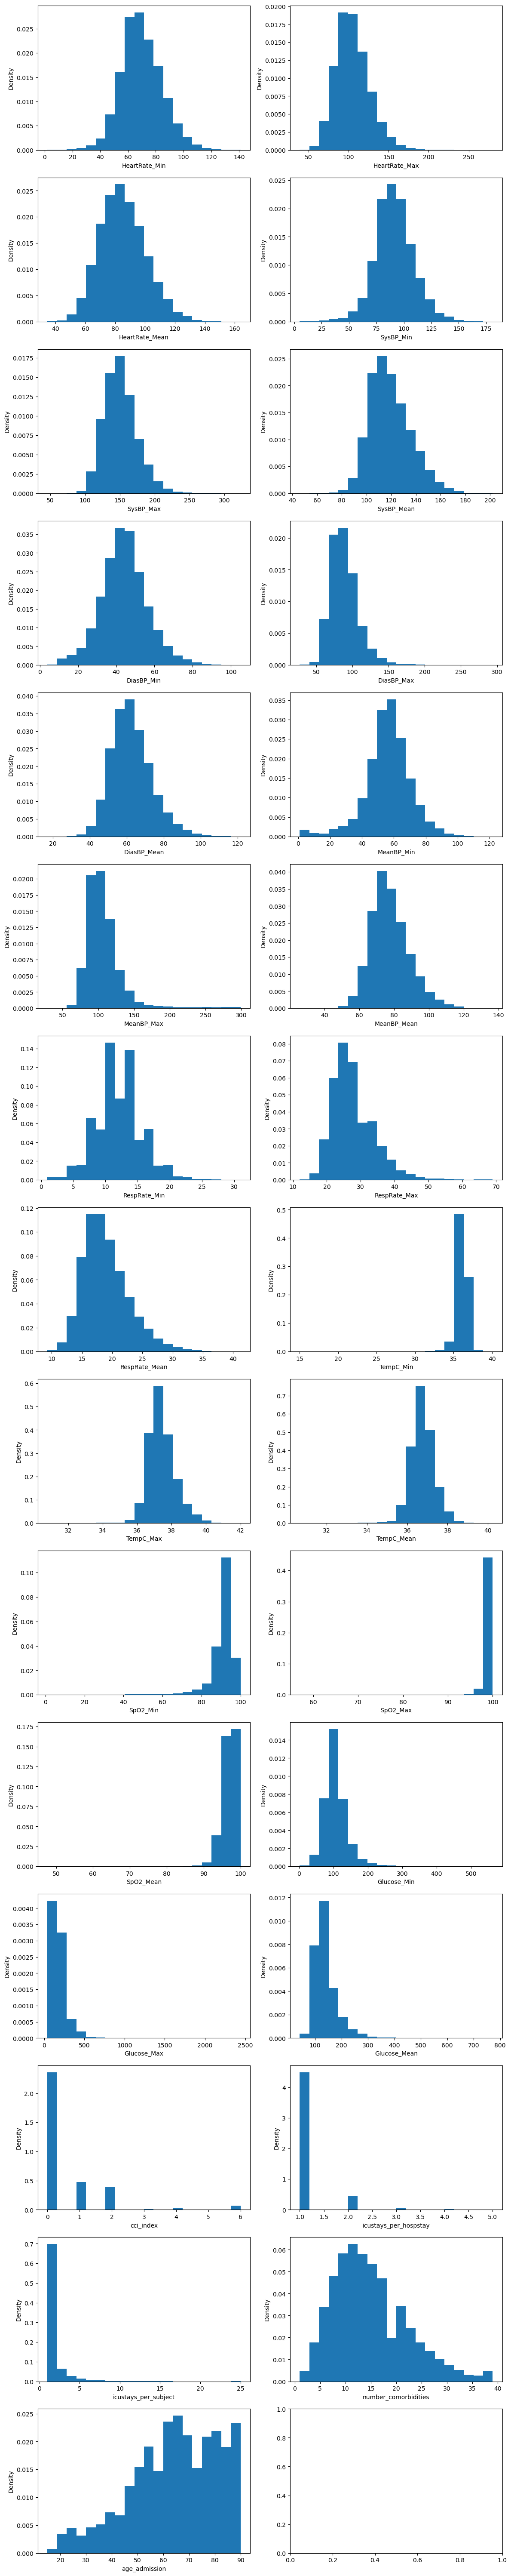

In [114]:
plot_histograms(df_concat_mod4[numerical_features], 20)

**Relevant insights**:
- Few  numerical variables seem to be normally distributed.

#### Correlation matrix

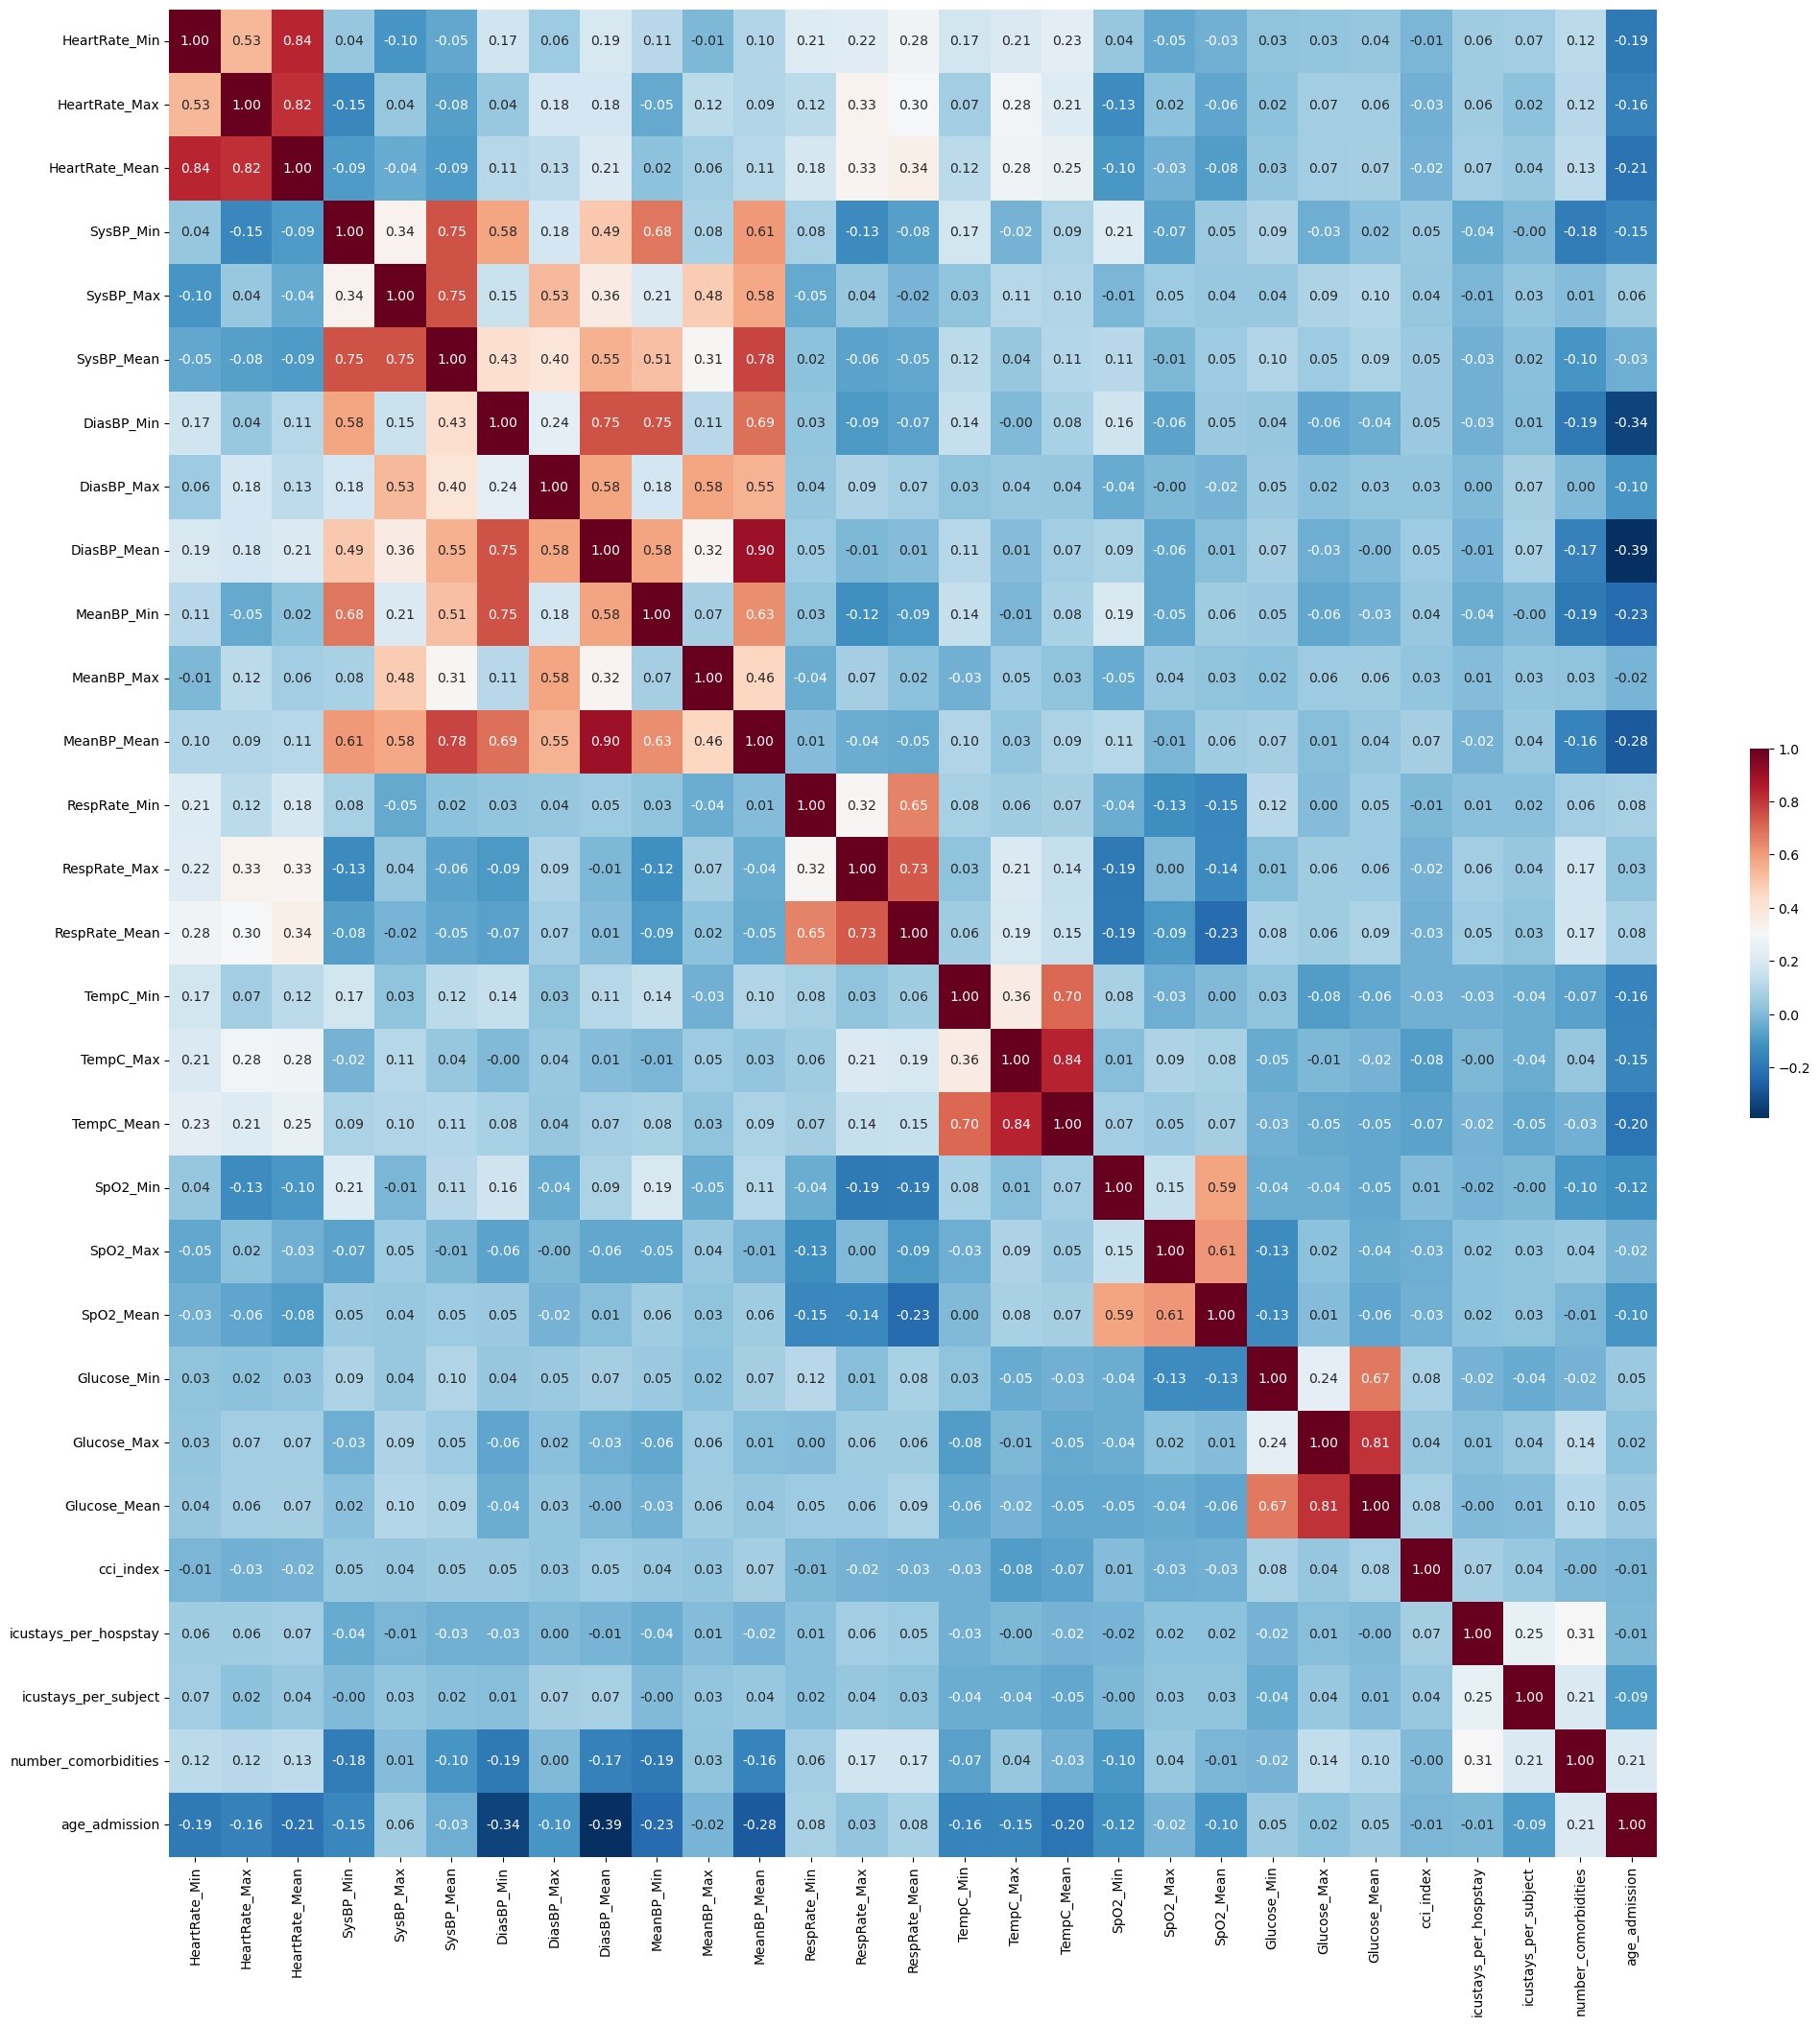

In [102]:
plt.figure(figsize = (25, 25))
sns.heatmap(correlation_matrix, 
            annot=True,  # Annotate with correlation values
            fmt=".2f",  # Format numbers to 2 decimal places
            cmap='RdBu_r', # Color legend
            cbar_kws={'shrink': 0.2})  # Adjust color bar size
plt.show()

**Relevant insights**:
- Overall, vital sign variables are correlated in groups of 3 (for min, max and mean).
- Blood pressure variables are considerably linearly correlated between them.

#### Boxplots
Below, we show boxplots for all the numerical variables categorized by the outcome. The idea is to check which plots have more different boxplots between different outcomes (either 1, death during ICU stay or 0), in order to get a first intuition of the variables that will have the highest predictive power.

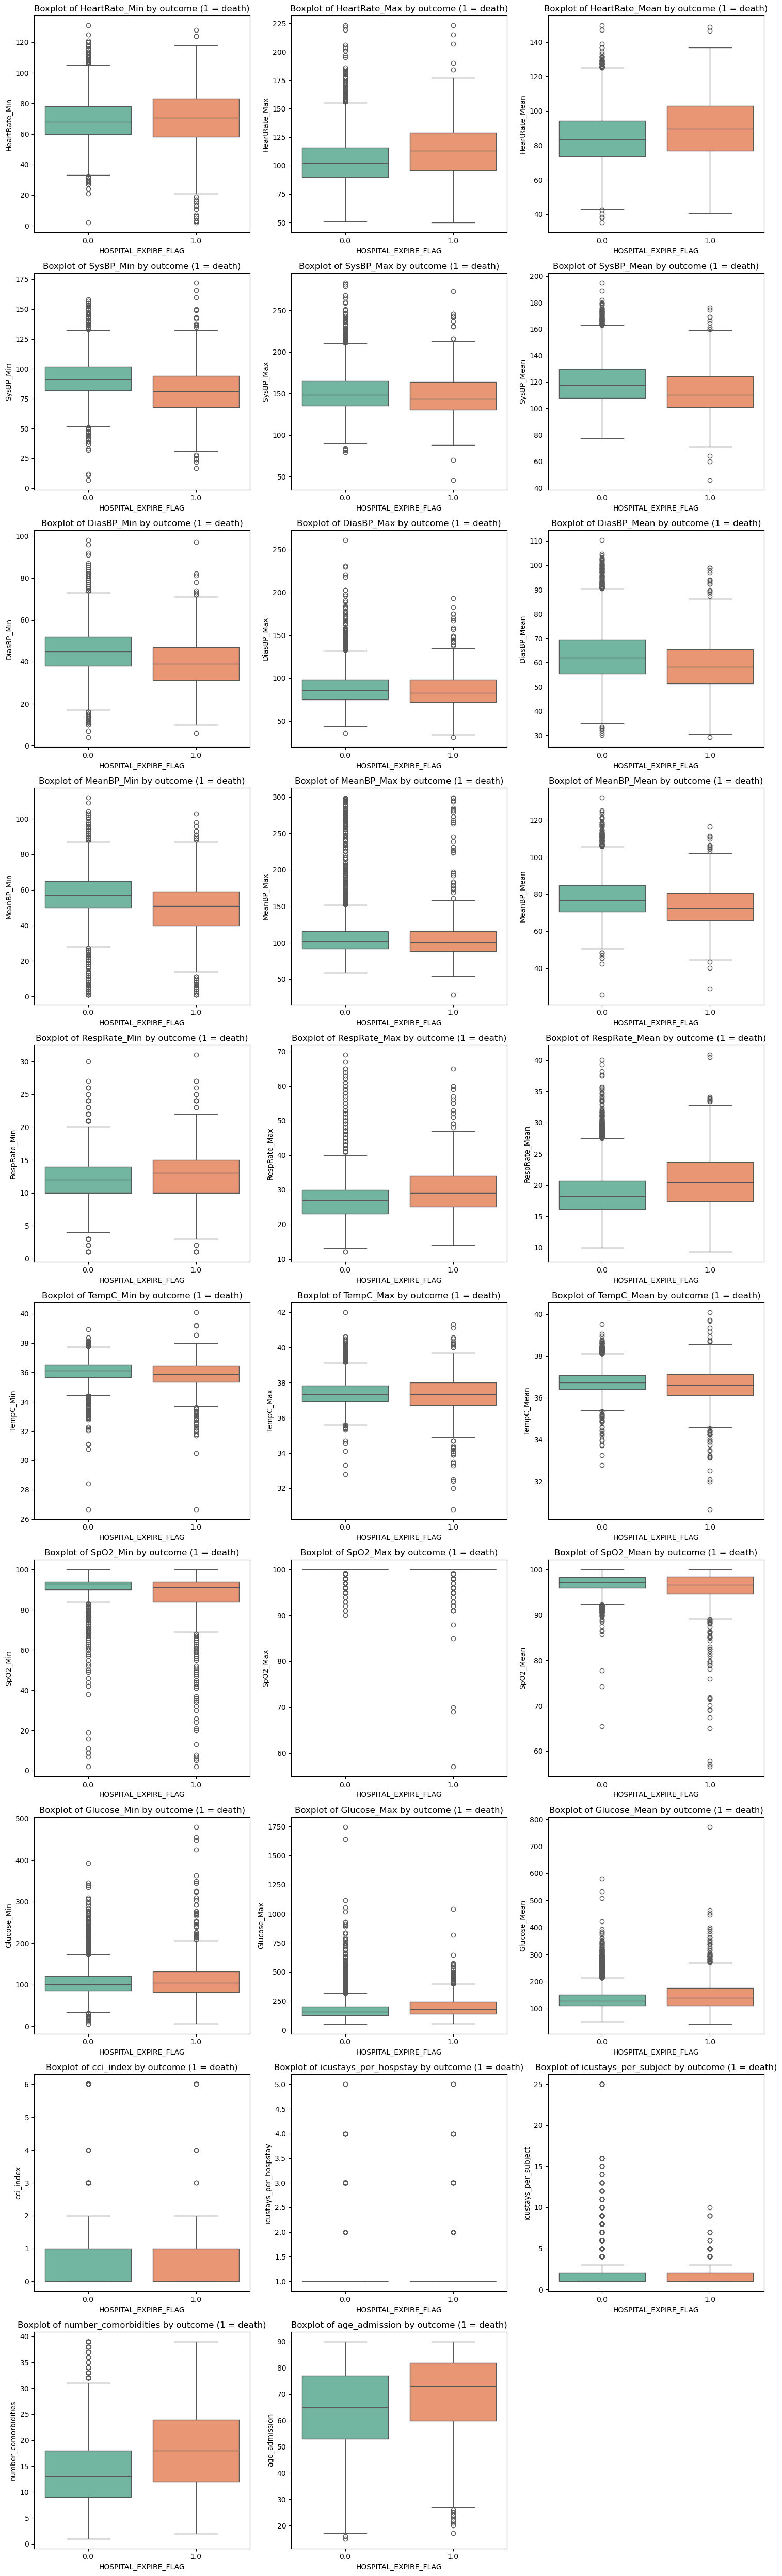

In [ ]:
# Define number of rows and columns for the subplot grid
num_features = len(numerical_features)
cols = 3  # Adjust based on how many plots you want per row
rows = math.ceil(num_features / cols)

# Create figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))  # Adjust figure size
axes = axes.flatten()  # Flatten in case of a 2D array

# Generate subplots
for i, feature in enumerate(numerical_features):
    sns.boxplot(
        data=df_concat_mod4, 
        x='HOSPITAL_EXPIRE_FLAG', 
        y=feature, 
        hue='HOSPITAL_EXPIRE_FLAG', 
        palette="Set2", 
        ax=axes[i],
        legend = False
    )
    axes[i].set_title(f'Boxplot of {feature} by outcome (1 = death)', fontsize=12)
    axes[i].set_ylabel(feature, fontsize=10)

# Hide unused subplots if the number of features is not a perfect multiple of cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Relevant insights (features that might have a good predictive power for classifying positions): it can be observed that some variables appear to have a higher predictive power of death than others.
- For instance, vitals have (in some cases) less variability between classes than could be expected.
- On the other hand, the number of comorbidities and the age of admission seem to have a relatively good predictive power.

### 2.2.2. Categorical data

#### Bar charts of relative frequencies

Bar charts of the relative frequencies of each category of the categorical features with a relatively low number of categories (so they can be visualized):

In [123]:
barplot_features = ['HOSPITAL_EXPIRE_FLAG'] + categorical_features

for column in barplot_features:
    # We save the relative frequencies of each column
    relative_freq = df_concat_mod4[column].value_counts(normalize=True).reset_index()
    # We change the naming of the columns
    relative_freq.columns = ['Category', 'Relative Frequency']
    
    # Create a bar plot with Plotly
    fig = px.bar(relative_freq, x='Category', y='Relative Frequency',
                 title=f'Relative Frequency Barplot of the variable {column}')
    
    # Show the plot
    fig.show()

## 2.3. Conclusions

Some conclusions after doing the EDA:
- Variables which will potentially have a high predictive power: see boxplots in 2.2.1.
- Religion and ethnicity may make the data too sparse - consider dropping them.